In [1]:
# pandas
import pandas as pd

# numpy
import numpy as np

# defaultcit
from collections import defaultdict

# plot with folium
import folium
from IPython.core.display import HTML

# parsing time
from datetime import datetime, timedelta

# plotting with matplotlib
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Clustering
from sklearn.cluster import MiniBatchKMeans, KMeans
import time
import json

# change prediction categories into labels
from sklearn import preprocessing
from sklearn import cross_validation 
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
raw_sfpd = pd.read_csv("kaggle_data/train.csv")

In [3]:
raw_sfpd = pd.DataFrame(raw_sfpd)
raw_sfpd.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
# dtDate = datetime.strptime("07-27-2012","%m-%d-%Y")
datetime.strptime('2015-05-13 23:53:00', "%Y-%m-%d %H:%M:%S")

datetime.datetime(2015, 5, 13, 23, 53)

In [5]:
type(raw_sfpd.Dates.values[0])
temp = []
temp1 =[]
temp2 =[]
temp3 =[]
for i in range(len(raw_sfpd.Dates.values)):
#     print(i)
    moy = datetime.strptime(raw_sfpd.Dates.values[i], "%Y-%m-%d %H:%M:%S").month
    dom = datetime.strptime(raw_sfpd.Dates.values[i], "%Y-%m-%d %H:%M:%S").day
    hod = datetime.strptime(raw_sfpd.Dates.values[i], "%Y-%m-%d %H:%M:%S").hour
    moh = datetime.strptime(raw_sfpd.Dates.values[i], "%Y-%m-%d %H:%M:%S").minute
    temp.append(moy)
    temp1.append(dom)
    temp2.append(hod)
    temp3.append(moh)
raw_sfpd['month_of_year'] = temp
raw_sfpd['day_of_month'] = temp1
raw_sfpd['hour_of_day'] = temp2
raw_sfpd['min_of_hour'] = temp3

In [6]:
raw_sfpd.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month_of_year,day_of_month,hour_of_day,min_of_hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,5,13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,5,13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,5,13,23,30


In [7]:
week_dummies = pd.get_dummies(raw_sfpd.DayOfWeek)
district_dummies = pd.get_dummies(raw_sfpd.PdDistrict)
# week_dummies[:10]

format_sfpd = pd.concat([raw_sfpd, week_dummies, district_dummies], axis=1, join_axes=[raw_sfpd.index])
print(raw_sfpd.shape)
print(week_dummies.shape)
print(district_dummies.shape)
print(format_sfpd.shape)

# format_sfpd[:10]

(878049, 13)
(878049, 7)
(878049, 10)
(878049, 30)


In [8]:
le_crime = preprocessing.LabelEncoder()
crime = le_crime.fit_transform(format_sfpd.Category)
format_sfpd['dummy_Category'] = crime
format_sfpd.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month_of_year,...,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,dummy_Category
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,...,0,0,0,1,0,0,0,0,0,37
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,...,0,0,0,1,0,0,0,0,0,21
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,5,...,0,0,0,1,0,0,0,0,0,21
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,5,...,0,0,0,1,0,0,0,0,0,16
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,5,...,0,0,0,0,1,0,0,0,0,16


In [9]:
len(raw_sfpd.Category.unique())

39

In [10]:
categories = list(raw_sfpd.Category.unique())
print(categories)

['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT', 'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS', 'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS', 'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY', 'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD', 'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE', 'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT', 'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY', 'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT']


In [11]:
# counts = dict()
# for i in items:
#   counts[i] = counts.get(i, 0) + 1

categories_dict = defaultdict(int)
for item in raw_sfpd.Category:
    categories_dict[item] += 1

(sorted(categories_dict.items(), key=lambda x: x[1], reverse=True))

[('LARCENY/THEFT', 174900),
 ('OTHER OFFENSES', 126182),
 ('NON-CRIMINAL', 92304),
 ('ASSAULT', 76876),
 ('DRUG/NARCOTIC', 53971),
 ('VEHICLE THEFT', 53781),
 ('VANDALISM', 44725),
 ('WARRANTS', 42214),
 ('BURGLARY', 36755),
 ('SUSPICIOUS OCC', 31414),
 ('MISSING PERSON', 25989),
 ('ROBBERY', 23000),
 ('FRAUD', 16679),
 ('FORGERY/COUNTERFEITING', 10609),
 ('SECONDARY CODES', 9985),
 ('WEAPON LAWS', 8555),
 ('PROSTITUTION', 7484),
 ('TRESPASS', 7326),
 ('STOLEN PROPERTY', 4540),
 ('SEX OFFENSES FORCIBLE', 4388),
 ('DISORDERLY CONDUCT', 4320),
 ('DRUNKENNESS', 4280),
 ('RECOVERED VEHICLE', 3138),
 ('KIDNAPPING', 2341),
 ('DRIVING UNDER THE INFLUENCE', 2268),
 ('RUNAWAY', 1946),
 ('LIQUOR LAWS', 1903),
 ('ARSON', 1513),
 ('LOITERING', 1225),
 ('EMBEZZLEMENT', 1166),
 ('SUICIDE', 508),
 ('FAMILY OFFENSES', 491),
 ('BAD CHECKS', 406),
 ('BRIBERY', 289),
 ('EXTORTION', 256),
 ('SEX OFFENSES NON FORCIBLE', 148),
 ('GAMBLING', 146),
 ('PORNOGRAPHY/OBSCENE MAT', 22),
 ('TREA', 6)]

In [12]:
# felonies_category = ['LARCENY/THEFT','ASSAULT','VEHICLE THEFT','DRUG/NARCOTIC',]

# misdemeanors = []

# infrac_wobblers = ['OTHER OFFENSES','NON-CRIMINAL',]

In [13]:
def inline_map(m, width=650, height=500):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{}" '
                 'style="width: {}px; height: {}px; '
                 'border: none"></iframe>'.format(srcdoc, width, height))
    return embed

In [14]:
# testing base map
width, height = 750, 450
taxi_loc = folium.Map(location=[37.759953, -122.44147], zoom_start=12,
                    tiles='OpenStreetMap', width=width, height=height)

# for c,e in zip(clustering_end2.cluster_centers_, end_normalized):
#     taxi_loc.circle_marker(location=(c[0],c[1]), radius=(300 * (e + 0.3)), line_color=None, fill_color='red', fill_opacity=0.5)

# for c,s in zip(clustering_start2.cluster_centers_, start_normalized):
#     taxi_loc.circle_marker(location=(c[0],c[1]), radius=(300 * (s + 0.3)), line_color=None, fill_color='white', fill_opacity=0.9)

# taxi_loc.geo_json(geo_path='TAZ.geojson', fill_opacity=0.2, line_opacity=0.2)
    
inline_map(taxi_loc, width, height)

In [15]:
# plot using matplotlib

In [16]:
matplotlib.style.use('ggplot')

In [17]:
categories_dict

defaultdict(<class 'int'>, {'LOITERING': 1225, 'ROBBERY': 23000, 'TRESPASS': 7326, 'LIQUOR LAWS': 1903, 'PROSTITUTION': 7484, 'SEX OFFENSES NON FORCIBLE': 148, 'ARSON': 1513, 'NON-CRIMINAL': 92304, 'BAD CHECKS': 406, 'BRIBERY': 289, 'EMBEZZLEMENT': 1166, 'WARRANTS': 42214, 'FORGERY/COUNTERFEITING': 10609, 'DRIVING UNDER THE INFLUENCE': 2268, 'VEHICLE THEFT': 53781, 'RUNAWAY': 1946, 'FRAUD': 16679, 'GAMBLING': 146, 'DISORDERLY CONDUCT': 4320, 'DRUNKENNESS': 4280, 'MISSING PERSON': 25989, 'SECONDARY CODES': 9985, 'OTHER OFFENSES': 126182, 'ASSAULT': 76876, 'SUICIDE': 508, 'SEX OFFENSES FORCIBLE': 4388, 'TREA': 6, 'RECOVERED VEHICLE': 3138, 'WEAPON LAWS': 8555, 'DRUG/NARCOTIC': 53971, 'PORNOGRAPHY/OBSCENE MAT': 22, 'LARCENY/THEFT': 174900, 'EXTORTION': 256, 'KIDNAPPING': 2341, 'BURGLARY': 36755, 'STOLEN PROPERTY': 4540, 'FAMILY OFFENSES': 491, 'VANDALISM': 44725, 'SUSPICIOUS OCC': 31414})

In [18]:
# # df.plot.barh(raw_sfpd)

# plt.figure(figsize=(15,5))

# # population_counties = sorted(population_counties, key=lambda tup:tup[1])

# # counties_list = [county[0] for county in population_counties]
# # per_capita_pop = [pop[1] for pop in population_counties]

# N = len(categories_dict.items())

# # counties_list = [county[0] for county in population_counties]
# # per_capita_pop = [pop[1] for pop in population_counties]

# ind = np.arange(N)  # the x locations for the groups
# width = 0.5       # the width of the bars

# #fig, ax = plt.subplots()
# rects1 = plt.bar(ind, categories_dict.values(), width=width, color='r')

# # plt.xticks(N + width, ('A', 'B', 'C', 'D', 'E'))
# plt.xticks(range(N), list(categories_dict.keys(), rotation=90)

# plt.show()

### Static Map ###

In [19]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)

# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


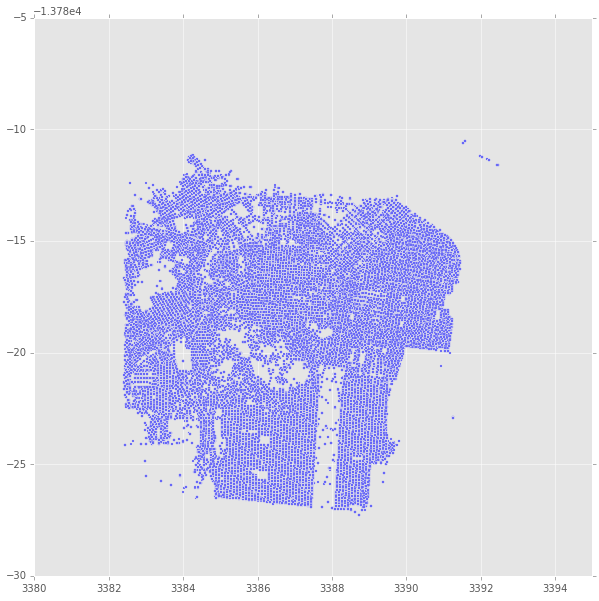

In [20]:
# change into meters
# pair_coordinates = [[item[0]*89.7, item[1]*112.7] for item in pair_coordinates]
# create scater plot
lat = raw_sfpd.Y*89.7
long = raw_sfpd.X*112.7
category_cluster = raw_sfpd.Category
# set axes range
plt.xlim(3380, 3395)
plt.ylim(-13810, -13785)
plt.scatter(lat, long, marker=u'.')

### Apply Mini Batch ###

** first, zip lat and long into list for clustering **

In [21]:
pair_coordinates = list(zip(lat,long))
# lat = raw_sfpd.Y*89.7
# long = raw_sfpd.X*112.7
pair_coordinates[:2]

[(3388.3814940320208, -13797.397991787828),
 (3388.3814940320208, -13797.397991787828)]

** two functions **
* mbk_time only outputs time... to find optimal batch size given cluster size 3 in the example
* optimal_mbk_time uses optimal batch size and cluster to output desired variables

In [22]:
# create mini batch function that takes clustersize and batchsize as parameters
def mbk_time(cluster_size, batch_size):
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=cluster_size, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
    t0 = time.time()
    mbk.fit(pair_coordinates)
    t_mini_batch = time.time() - t0
    return t_mini_batch

# create mini batch function that takes clustersize and batchsize as parameters
def optimal_mbk_time(cluster_size, batch_size):
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=cluster_size, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
    t0 = time.time()
    mbk.fit(pair_coordinates)
    t_mini_batch = time.time() - t0
    mbk_means_labels = mbk.labels_
    mbk_means_cluster_centers = mbk.cluster_centers_
    mbk_means_labels_unique = np.unique(mbk_means_labels)
    return t_mini_batch, mbk_means_labels, mbk_means_cluster_centers, mbk_means_labels_unique

** find optimal cluster size by using for loop **

In [23]:
mbk_means_batch = []
x = 100
while x < 10000:
    mbk_means_batch.append((x,round(mbk_time(cluster_size=3, batch_size=x),2)))
    x += 200

In [24]:
mbk_means_batch[:2]

[(100, 2.1), (300, 0.96)]

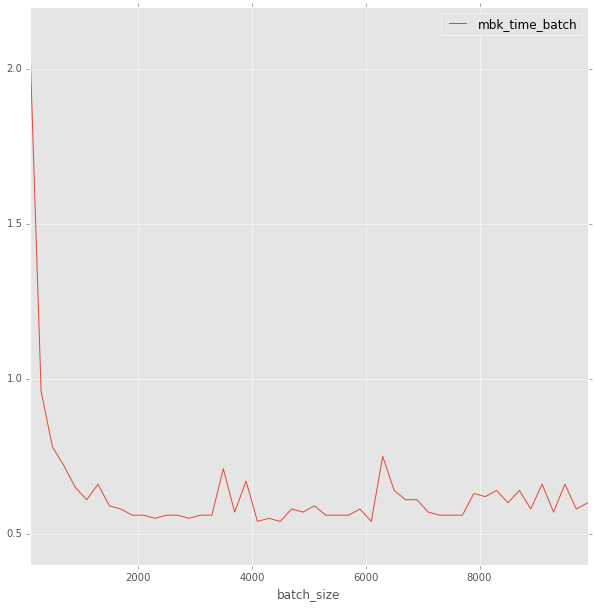

In [25]:
# plot optimal max batch size
mbk_batch_df = pd.DataFrame(mbk_means_batch)
mbk_batch_df.columns = ['batch_size', 'mbk_time_batch']
mbk_batch_df.plot(x = 'batch_size',y = 'mbk_time_batch')

In [26]:
# minimum batch around 3000
min_batch = mbk_batch_df['batch_size'][mbk_batch_df['mbk_time_batch']==mbk_batch_df['mbk_time_batch'].min()].values
print(min_batch)

[4100 4500 6100]


** apply clusters **

In [27]:
optimal_time, optimal_labels, optimal_centers, optimal_unique_labels = optimal_mbk_time(200,3000)

In [28]:
full_list = list(zip(optimal_labels, pair_coordinates, category_cluster))

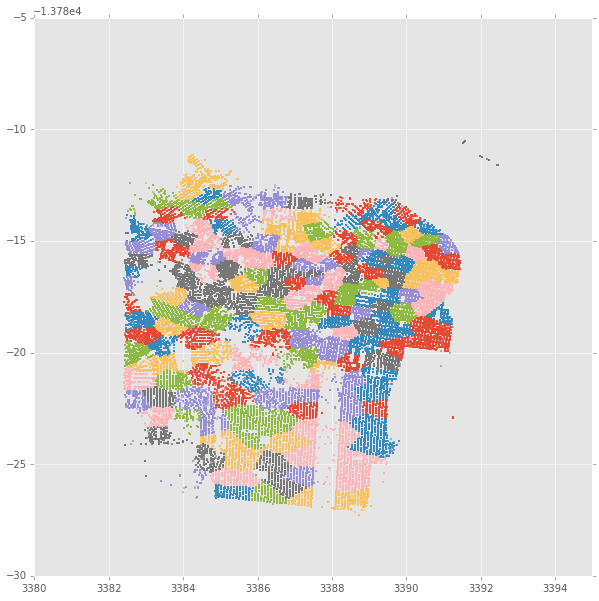

In [29]:
cluster_color = [item[0] for item in full_list ]
lat_mini = [item[1][0] for item in full_list]
long_mini = [item[1][1] for item in full_list]

# df = pandas.DataFrame(dict(lat_mini=lat_mini, long_mini=long_mini, cluster_color=cluster_color))

# #df = pandas.DataFrame(lat_mini=lat_mini, long_mini=long_mini, cluster_color=cluster_color)
# df.plot(kind='scatter', x='lat_mini', y='long_mini', color='DarkBlue')

df_clustering = pd.DataFrame(dict(lat_mini=lat_mini, long_mini=long_mini, cluster_color=cluster_color, category=category_cluster))

groups = df_clustering.groupby('cluster_color')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.lat_mini, group.long_mini, marker='.', linestyle='', ms=2, label=name)
#ax.legend()
plt.xlim(3380, 3395)
plt.ylim(-13810, -13785)
plt.show()

In [30]:
df_clustering.head()

,category,cluster_color,lat_mini,long_mini
0,WARRANTS,47,3388.381494,-13797.397992
1,OTHER OFFENSES,47,3388.381494,-13797.397992
2,OTHER OFFENSES,62,3390.697165,-13797.225713
3,LARCENY/THEFT,146,3390.738275,-13797.522373
4,LARCENY/THEFT,148,3388.107243,-13798.845730


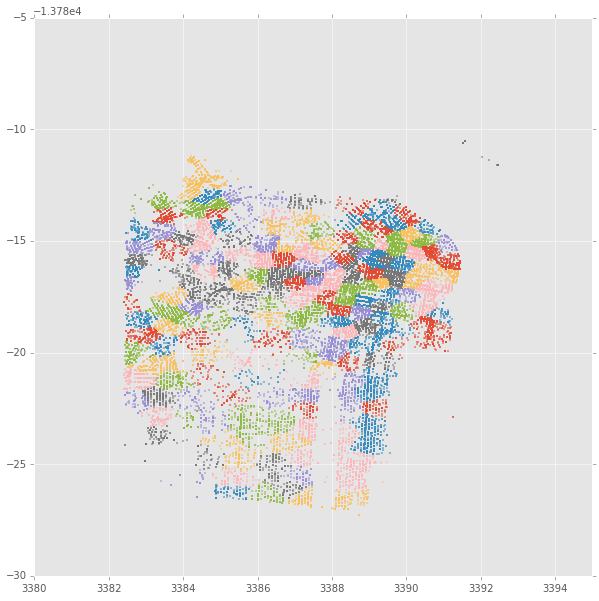

In [31]:
df_clustering2 = pd.DataFrame(dict(lat_mini=lat_mini, long_mini=long_mini, cluster_color=cluster_color, category=category_cluster))
df_clustering2 = df_clustering2[df_clustering2.category=="ASSAULT"]

groups2 = df_clustering2.groupby('cluster_color')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups2:
    ax.plot(group.lat_mini, group.long_mini, marker='.', linestyle='', ms=2, label=name)
#ax.legend()
plt.xlim(3380, 3395)
plt.ylim(-13810, -13785)
plt.show()

### use format_sfpd to start predicting

In [32]:
format_sfpd.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month_of_year,...,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,dummy_Category
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,...,0,0,0,1,0,0,0,0,0,37
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,...,0,0,0,1,0,0,0,0,0,21
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,5,...,0,0,0,1,0,0,0,0,0,21
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,5,...,0,0,0,1,0,0,0,0,0,16
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,5,...,0,0,0,0,1,0,0,0,0,16


## Train on smaller dataset

In [33]:
format_sfpd.shape

(878049, 31)

In [34]:
training_data = format_sfpd[:10000]

In [35]:
training_data.shape

(10000, 31)

In [36]:
training_data.columns


Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'month_of_year', 'day_of_month',
       'hour_of_day', 'min_of_hour', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'BAYVIEW', 'CENTRAL', 'INGLESIDE',
       'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL',
       'TENDERLOIN', 'dummy_Category'],
      dtype='object')

In [37]:
# Lat/Long
X_feature = (True, 'X')
Y_feature = (True, 'Y')

# Time
Month_feature = (False, 'month_of_year')
Day_feature = (False, 'day_of_month')
Hour_feature = (True, 'hour_of_day')
Min_feature = (False, 'min_of_hour')

# Day of Week
Friday_feature = (True, 'Friday') 
Monday_feature = (True, 'Monday')
Saturday_feature = (True, 'Saturday')
Sunday_feature = (True, 'Sunday')
Thursday_feature = (True, 'Thursday')
Tuesday_feature = (True, 'Tuesday')
Wednesday_feature = (True, 'Wednesday')

# District
BAYV_feature = (True, 'BAYVIEW')
CENT_feature = (True, 'CENTRAL')
INGL_feature = (True, 'INGLESIDE')
MISS_feature = (True, 'MISSION')
NORT_feature = (True, 'NORTHERN')
PARK_feature = (True, 'PARK')
RICH_feature = (True, 'RICHMOND')
SOUT_feature = (True, 'SOUTHERN')
TARA_feature = (True, 'TARAVAL')
TEND_feature = (True, 'TENDERLOIN')
      


In [38]:
feature_list = [X_feature, Y_feature, Monday_feature, Day_feature, Hour_feature, Min_feature,
               Friday_feature, Monday_feature, Saturday_feature, Sunday_feature, Thursday_feature,
               Tuesday_feature, Wednesday_feature, BAYV_feature, CENT_feature, INGL_feature,
               MISS_feature, NORT_feature, PARK_feature, RICH_feature, SOUT_feature, TARA_feature, 
               TEND_feature]

features = [str(x[1]) for x in feature_list if x[0]]
features

['X',
 'Y',
 'Monday',
 'hour_of_day',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'BAYVIEW',
 'CENTRAL',
 'INGLESIDE',
 'MISSION',
 'NORTHERN',
 'PARK',
 'RICHMOND',
 'SOUTHERN',
 'TARAVAL',
 'TENDERLOIN']

In [39]:
# features = ['X', 'Y', 'month_of_year', 'day_of_month',
#             'hour_of_day', 'min_of_hour', 'Friday', 'Monday', 'Saturday', 'Sunday',
#             'Thursday', 'Tuesday', 'Wednesday']

## SVM

**1) svm with single fold**

In [40]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(
    training_data[features], training_data['dummy_Category'], test_size=0.2, random_state=0)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 21)
(2000, 21)
(8000,)
(2000,)


In [42]:
#KNN - gives lowest error; does well with tons of data; ratio does not go to infiniti; data, ratio, (30 max)
# extra features on day: holiday; weekend; weekday; time of year; but do exploratory analyssi to find best features
# randomforest and decision tree will tell you the importance of feature
# 2D kernel density estimation

svc_model = svm.SVC(kernel = 'rbf', C=10.0).fit(x_train, y_train)

svc_model.score(x_test, y_test) 

0.27000000000000002

**2) svm with crossfolds**

In [43]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8000, 21) (8000,)
(2000, 21) (2000,)


In [ ]:
print(training_data[features].shape)
print(training_data['dummy_Category'].shape)

(10000, 21)
(10000,)


In [ ]:
svm_2 = svm.SVC(kernel = 'rbf', C=90.0)
scores = cross_validation.cross_val_score(
    svm_2, training_data[features], training_data['dummy_Category'], cv=5)
scores

In [45]:
SVM_tuned_parameters = [{'kernel': ['rbf'],
                     'gamma': [1e-1, 1e-2, 1e-3, 1e-4], 'C': [1, 10, 50, 100, 500, 1000]}
                   ]

SVM_scores = ['precision', 'recall']

In [46]:
print(SVM_tuned_parameters)
print(SVM_scores)

[{'gamma': [0.1, 0.01, 0.001, 0.0001], 'C': [1, 10, 50, 100, 500, 1000], 'kernel': ['rbf']}]
['precision', 'recall']


In [49]:
for score in SVM_scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(C=1), SVM_tuned_parameters, cv=5,
                       scoring='%s_weighted' % score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

/Users/carlo_liquido/anaconda/lib/python3.4/site-packages/sklearn/cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
/Users/carlo_liquido/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/carlo_liquido/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/carlo_liquido/anaconda/lib/python3.4/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precis

# Tuning hyper-parameters for precision



KeyboardInterrupt: 